In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 7

Given two straight lines constructed on a straight line [from its extremities] and meeting in a point, there cannot be constructed on the same straight line [from its extremities], and on the same side of it, two other straight lines meeting in another point and equal to the former two respectively, namely each to that which has the same extremity with it.

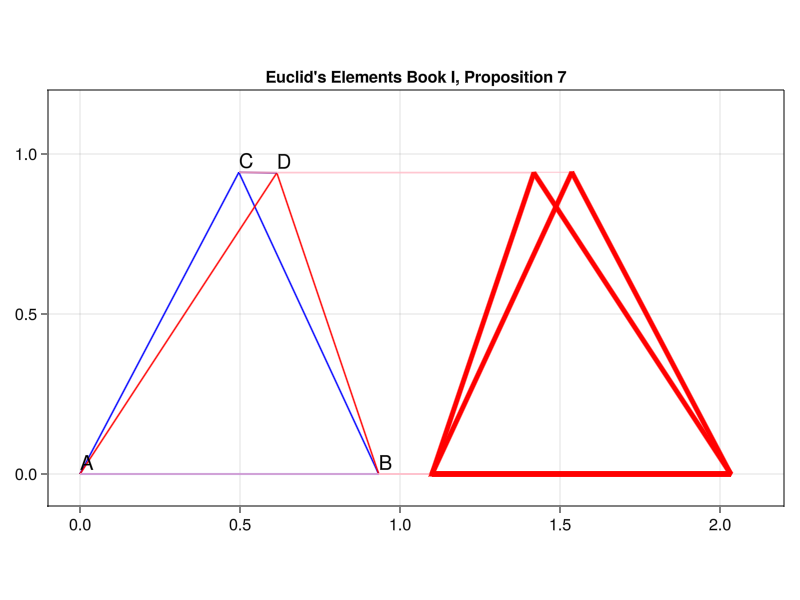

In [23]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 7")
xlims!(-0.1, 2.2)
ylims!(-0.1, 1.2)


# For, if possible, given two straight lines AC, CB constructed
# on the straight line AB and meeting at the point C,
A = Point2f0(0, 0)
B = Point2f0(rand(Uniform(0.5f0, 1f0)), 0)
C = Point2f0(rand(Uniform(0f0, B[1])), rand(Uniform(0.5f0, 1f0)))
lines!([A, B], color=:blue)
lines!([B, C], color=:blue)
lines!([A, C], color=:blue)

# let two other straight lines AD, DB be constructed on the
# same straight line AB, on the same side of it, meeting in
# another point D and equal to the former two respectively,     [Note: not actually equal--this is absurd]
# namely each to that which has the same extremity with it,
# so that CA is equal to DA which has the same extremity A with it,
# and CB to DB which has the same extremity B with it;
D = Point2f0(rand(Uniform(C[1], B[1])), rand(Uniform(0.5f0, C[2])))
lines!([B, D], color=:red)
lines!([A, D], color=:red)

# and let CD be joined.
lines!([C, D], color=:purple)


# Then, since AC is equal to AD     [Note: still absurd]
#   the angle ACD is also equal to the angle ADC; [I.5]
#   therefore the angle ADC is greater than the angle DCB;
#   therefore the angle CDB is much greater than the angle DCB.
# Again, since CB is equal to DB,
#   the angle CDB is also equal to the angle DCB.
# But it was also proved much greater than it:
# which is impossible.
comp = compare_triangle(A, B, C, A, B, D, Point2f0(1.1, 0), 0f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)
fill_tricompare(comp)



# Therefore etc.
#       Q.E.D.


#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")


#Draw and show the chart :)
current_figure()

### Animation

In [28]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 7")
xlims!(-0.1, 2.5)
ylims!(-0.1, 1.2)

# We will use the same points as above (can uncomment if necessary)


# For, if possible, given two straight lines AC, CB constructed
# on the straight line AB and meeting at the point C,
#A = Point2f0(0, 0)
#B = Point2f0(rand(Uniform(0.5f0, 1f0)), 0)
#C = Point2f0(rand(Uniform(0f0, B[1])), rand(Uniform(0.5f0, 1f0)))
lines!([A, B], color=:blue)
lines!([B, C], color=:blue)
lines!([A, C], color=:blue)

# let two other straight lines AD, DB be constructed on the
# same straight line AB, on the same side of it, meeting in
# another point D and equal to the former two respectively,     [Note: not actually equal--this is absurd]
# namely each to that which has the same extremity with it,
# so that CA is equal to DA which has the same extremity A with it,
# and CB to DB which has the same extremity B with it;
#D = Point2f0(rand(Uniform(C[1], B[1])), rand(Uniform(0.5f0, C[2])))
BD = straight_line(B, D, color=:red, linewidth=1f0, cursorwidth=0.01f0)
AD = straight_line(A, D, color=:red, linewidth=1f0, cursorwidth=0.01f0)

# and let CD be joined.
CD = straight_line(C, D, color=:purple, linewidth=1f0, cursorwidth=0.01f0)


# Then, since AC is equal to AD     [Note: still absurd]
#   the angle ACD is also equal to the angle ADC; [I.5]
#   therefore the angle ADC is greater than the angle DCB;
#   therefore the angle CDB is much greater than the angle DCB.
# Again, since CB is equal to DB,
#   the angle CDB is also equal to the angle DCB.
# But it was also proved much greater than it:
# which is impossible.
ACD_BDC = compare_triangle(A, C, D, B, D, C, Point2f0(1.3, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)
ABC_ABD = compare_triangle(A, B, C, A, B, D, Point2f0(1.5, 0), 0f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)



# Therefore etc.
#       Q.E.D.


#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
DAlpha = Observable(0f0)
Dpoint = text!(D, text="D", color=@lift(RGBA(1.0, 0, 0, $DAlpha)))


# Draw the animation!
framerate = 24
d_s = 24
t_rots = 5π
timestamps = range(0,t_rots, step=t_rots/(d_s*framerate))

record(f, "Euclid-I-07.01.gif", timestamps; framerate=framerate) do t

    # animate the drawing setup
    animate_line(BD, 1f0π, 1.5f0π, t)
    animate_line(AD, 1.5f0π, 2f0π, t)
    animate_line(CD, 2f0π, 2.5f0π, t)

    # Animate showing the point D
    if t > 0.5π && t <= π
        showD = (t - 0.5π)/0.5π
        DAlpha[] = showD
    elseif t > π
        DAlpha[] = 1f0
    end

    # animate the triangle comparisons
    animate_tricompare(ACD_BDC, 2.5f0π, 3f0π, t, fade_start=3.5π, fade_end=4.5π)
    animate_tricompare(ABC_ABD, 3f0π, 3.5f0π, t, fade_start=4π, fade_end=5π)
end;

![animation](Euclid-I-07.01.gif)